In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
menu = pd.read_csv('menu.csv')
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
#total records
menu.shape

(260, 24)

In [4]:
#check the columns for the dataset
print(len(menu.columns))
print(menu.columns)

24
Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


In [5]:
#next check if any missing values 
menu.isna().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [6]:
#below is chekcing data type for each feature
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [7]:
#serving size is currently recorded in different types of UOM (unit of measurement) which need to be sorted into more readable units
print('serving units')
unit_serving = menu['Serving Size'].str.findall(r'[a-z]+')
unit_serving.apply(lambda x : tuple(x)).value_counts()

serving units


(fl, oz, cup)    138
(oz, g)          116
(cookie, g)        2
(carton, ml)       2
(fl, oz, ml)       1
(fl, oz)           1
Name: Serving Size, dtype: int64

### the serving size with several types of units we will standardize into ml (drinks) and gram (food): str will be splited using space and get the first numeric and unit type before we convert all these
1. (fl, oz, cup)    138 - 1 fl oz = 29.5735 ml
2. (oz, g)          116 - 1 oz = 28.3495gm
3. (cookie, g)        2 - 1 cookie = 33gm
4. (carton, ml)       2 - 1 carton = 236ml
5. (fl, oz, ml)       1 - 1 fl oz = 29.5735 ml
6. (fl, oz)           1 - 1 fl oz = 29.5735 ml

In [8]:
#for easier extracing and conversion first numeric and unit will be used
menu['serving_rate'] = menu['Serving Size'].str.split(' ').str[0]
menu['serving_unit'] = menu['Serving Size'].str.split(' ').str[1]

In [9]:
menu['serving_rate'] = menu['serving_rate'].astype('float')

In [10]:
menu.serving_unit.value_counts()

fl        140
oz        116
carton      2
cookie      2
Name: serving_unit, dtype: int64

In [11]:
#new column created to capture new unit serving
def convert_size():
    for unit in menu.serving_unit:
        if unit == 'fl':
            menu['serving(gm/ml)'] = round((menu.serving_rate * 29.5735),0)
        elif unit == 'oz':
            menu['serving(gm/ml)'] = round((menu.serving_rate * 28.3495),0)
        elif unit == 'cookie':
            menu['serving(gm/ml)'] = round((menu.serving_rate * 33),0)
        elif unit == 'carton':
            menu['serving(gm/ml)'] = round((menu.serving_rate * 236),0)
convert_size()

In [12]:
menu.serving_unit.value_counts()
menu['unit'] = menu.serving_unit.apply(lambda x : 'ml' if x =='fl' else 'gm' if x == 'oz' else 'gm' if x == 'cookie' else 'ml') 

In [13]:
#drop serving_rate and serving_unit columns
menu = menu.drop(['serving_rate','serving_unit'],axis=1)

Text(0.5, 0, 'Items Count')

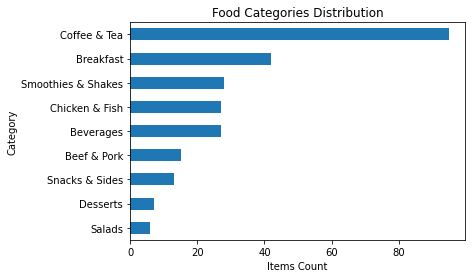

In [14]:
#check total category of macdonald menu and item variety in each category
menu.groupby('Category')['Item'].count().sort_values(ascending=True).plot.barh()
plt.title('Food Categories Distribution')
plt.xlabel('Items Count')

# Business Understanding
1. Food that contains highest fiber content
2. calories in macdonald's food
3. Explore content of daily average % of cholesterol and sodium in McDonald's menu versus other nutrition.
4. average daily % of each nutrition in McDonald's menu

## 1. Food that contains highest fiber content
- Dietary fiber adds bulk to your diet and makes you feel full faster, helping you control your weight. It helps digestion and helps prevent constipation.

Text(0.5, 1.0, 'Dietary Fiber distribution by Category')

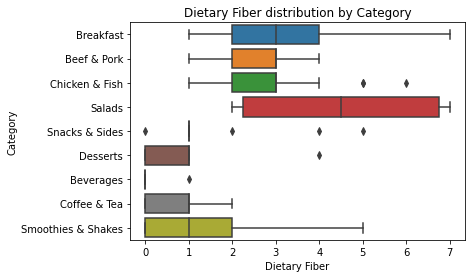

In [39]:
sns.boxplot(menu['Dietary Fiber'],y='Category', data=menu, orient='h')
plt.title('Dietary Fiber distribution by Category')

### salads seem to have the highest fiber distribution and mean reading of all the categories while beverges the lowest; below mean fiber ranking to confirm that

<AxesSubplot:ylabel='Category'>

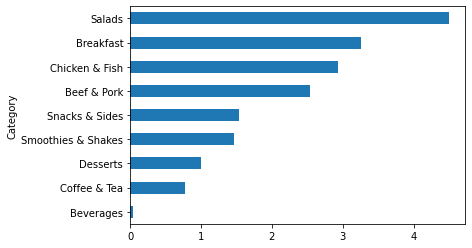

In [16]:
cat_fiber=menu.groupby('Category')['Dietary Fiber'].mean().sort_values(ascending=True)
cat_fiber.plot.barh()

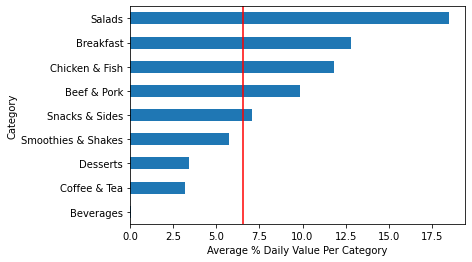

In [17]:
fiberpcnt_daily = menu['Dietary Fiber (% Daily Value)'].mean()
cat_fiber=menu.groupby('Category')['Dietary Fiber (% Daily Value)'].mean().sort_values(ascending=True)
cat_fiber.plot.barh()
plt.xlabel('Average % Daily Value Per Category')
plt.axvline(fiberpcnt_daily, color='r')

## 2. calories in macdonald's food
- The calorie is a unit of energy defined as the amount of heat needed to raise the temperature of a quantity of water by one degree.
- Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men

Text(0.5, 1.0, 'Calories distribution by Category')

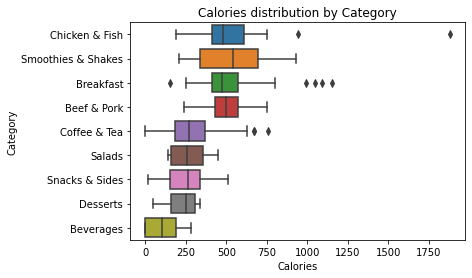

In [40]:
calories_sorted = menu.groupby('Category')['Calories'].mean().sort_values(ascending=False)
sns.boxplot(menu['Calories'],y='Category', data=menu, order=calories_sorted.index, orient='h')
plt.title('Calories distribution by Category')

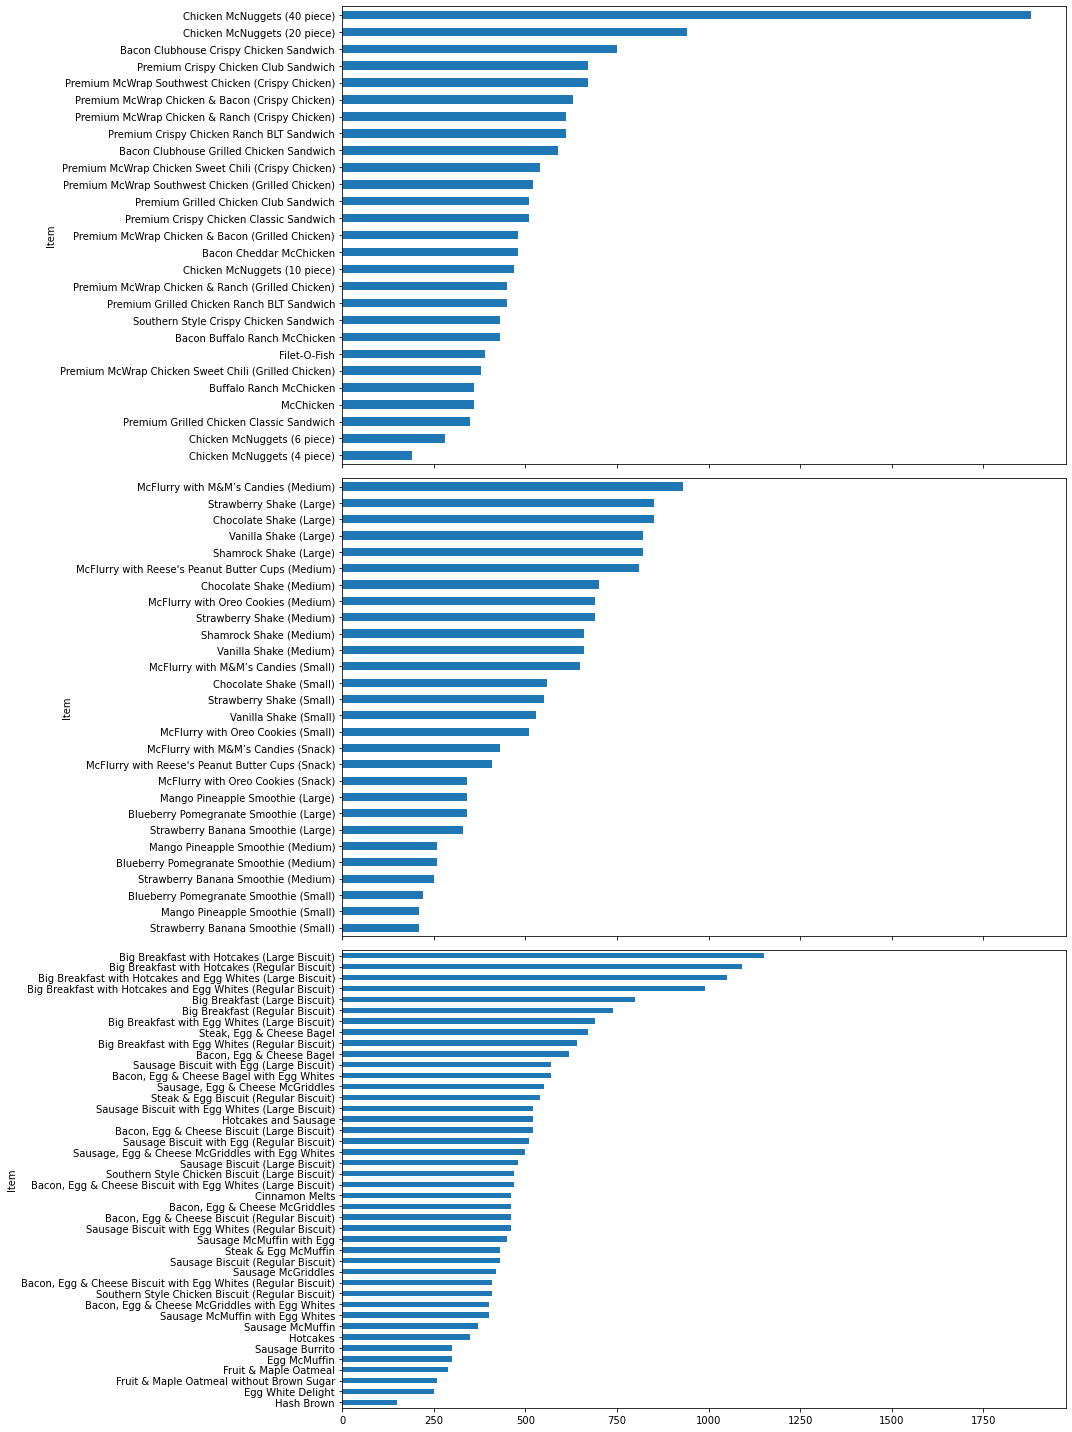

In [19]:
## verify a detected exremely high outlier category chicken & fish as well as rank 2nd & 3rd cateogry menu for calories 
fig = plt.figure(figsize=(15,20))
ax = fig.subplots(3,1,sharex=True)
menu[menu['Category']==calories_sorted.index[0]].groupby('Item')['Calories'].mean().sort_values(ascending=True).plot.barh(ax=ax[0])
menu[menu['Category']==calories_sorted.index[1]].groupby('Item')['Calories'].mean().sort_values(ascending=True).plot.barh(ax=ax[1])
menu[menu['Category']==calories_sorted.index[2]].groupby('Item')['Calories'].mean().sort_values(ascending=True).plot.barh(ax=ax[2])
plt.tight_layout()

<AxesSubplot:xlabel='Calories', ylabel='serving(gm/ml)'>

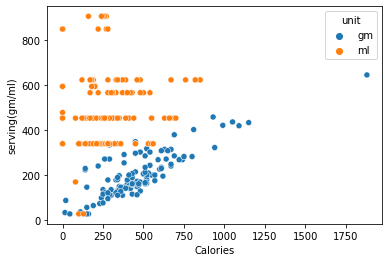

In [41]:
sns.scatterplot('Calories','serving(gm/ml)',data = menu, hue='unit')

### both graphs show the correlation between drink and food.
#### food (gm) is having high positive correlation while drink (ml) with low positive correlation with calories
#### p-value reading below support the hypothesis for both assuming significance level α at 0.5 threshold

Text(500, 750, 'p-value: 0.19008097849874217')

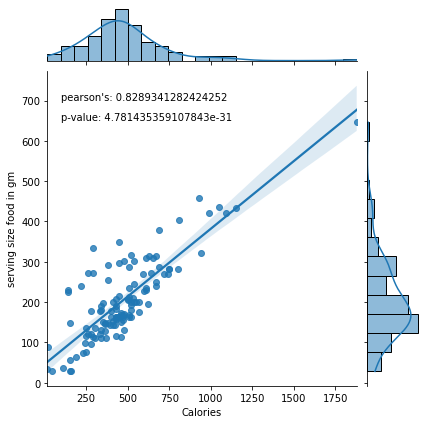

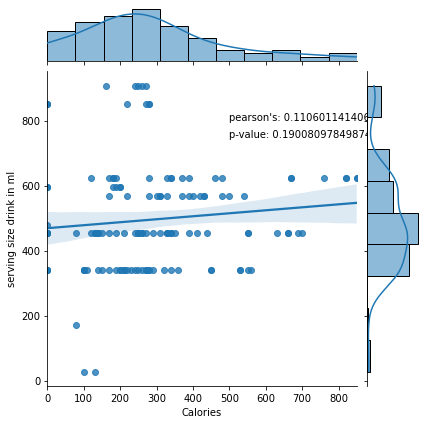

In [42]:
#there seem to be correlation between food (gm) and calories - let's look into seperately using jointplot
from scipy.stats import pearsonr
food = menu[menu['unit']=='gm']
food_cal_corr = pearsonr(food.Calories, food['serving(gm/ml)'])
sns.jointplot('Calories','serving(gm/ml)',data = food, kind='reg')
plt.ylabel('serving size food in gm')
plt.text(100,700,'pearson\'s: ' + str(food_cal_corr[0]))
plt.text(100,650,'p-value: ' + str(food_cal_corr[1]))

drink = menu[menu['unit']=='ml']
drink_cal_corr = pearsonr(drink.Calories, drink['serving(gm/ml)'])
sns.jointplot('Calories','serving(gm/ml)',data = drink, kind='reg')
plt.ylabel('serving size drink in ml')
plt.text(500,800,'pearson\'s: ' + str(drink_cal_corr[0]))
plt.text(500,750,'p-value: ' + str(drink_cal_corr[1]))

## 3. Explore content of daily average % of cholesterol and sodium in McDonald's menu versus other nutrition.

<AxesSubplot:ylabel='Category'>

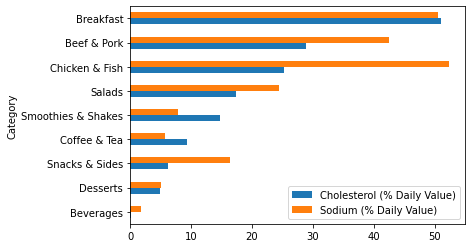

In [43]:
#	Cholesterol (% Daily Value)	Sodium (% Daily Value)
#check the menu category for cholesterol and sodium daily average %
menu.groupby('Category')['Cholesterol (% Daily Value)','Sodium (% Daily Value)'].mean().sort_values(by='Cholesterol (% Daily Value)', ascending=True).plot.barh()

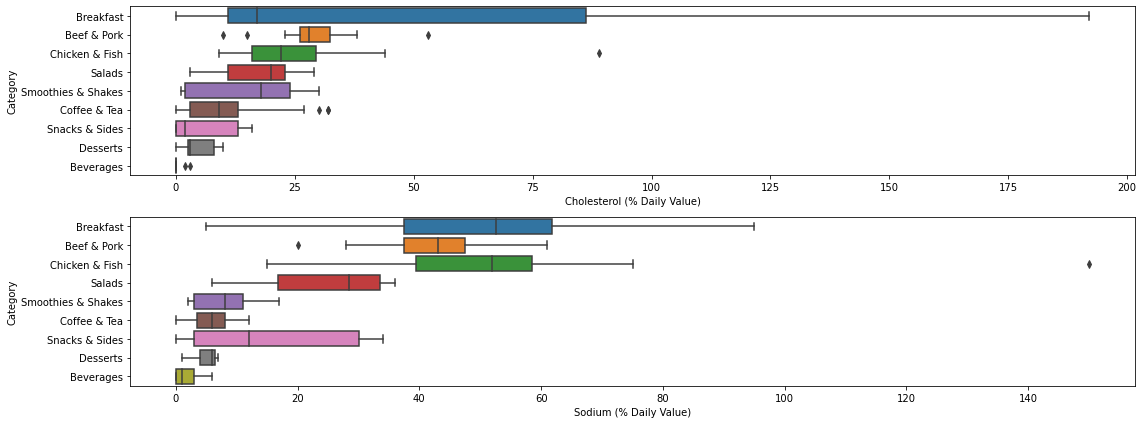

In [44]:
#distribution for Cholesterol % daily value
fig, ax = plt.subplots(2,1,figsize=(16,6))
chol_sorted = menu.groupby('Category')['Cholesterol (% Daily Value)'].mean().sort_values(ascending=False)
sns.boxplot(menu['Cholesterol (% Daily Value)'],y='Category', data=menu, order=chol_sorted.index, orient='h',ax=ax[0])
#distribution for Sodium % daily value

sol_sorted = menu.groupby('Category')['Sodium (% Daily Value)'].mean().sort_values(ascending=False)
sns.boxplot(menu['Sodium (% Daily Value)'],y='Category', data=menu, order=chol_sorted.index, orient='h',ax=ax[1])
plt.tight_layout()

### to investigate and verify type of breakfasts contribute the high cholesterol and sodium where some of the items exceeded the daily needed

<AxesSubplot:ylabel='Item'>

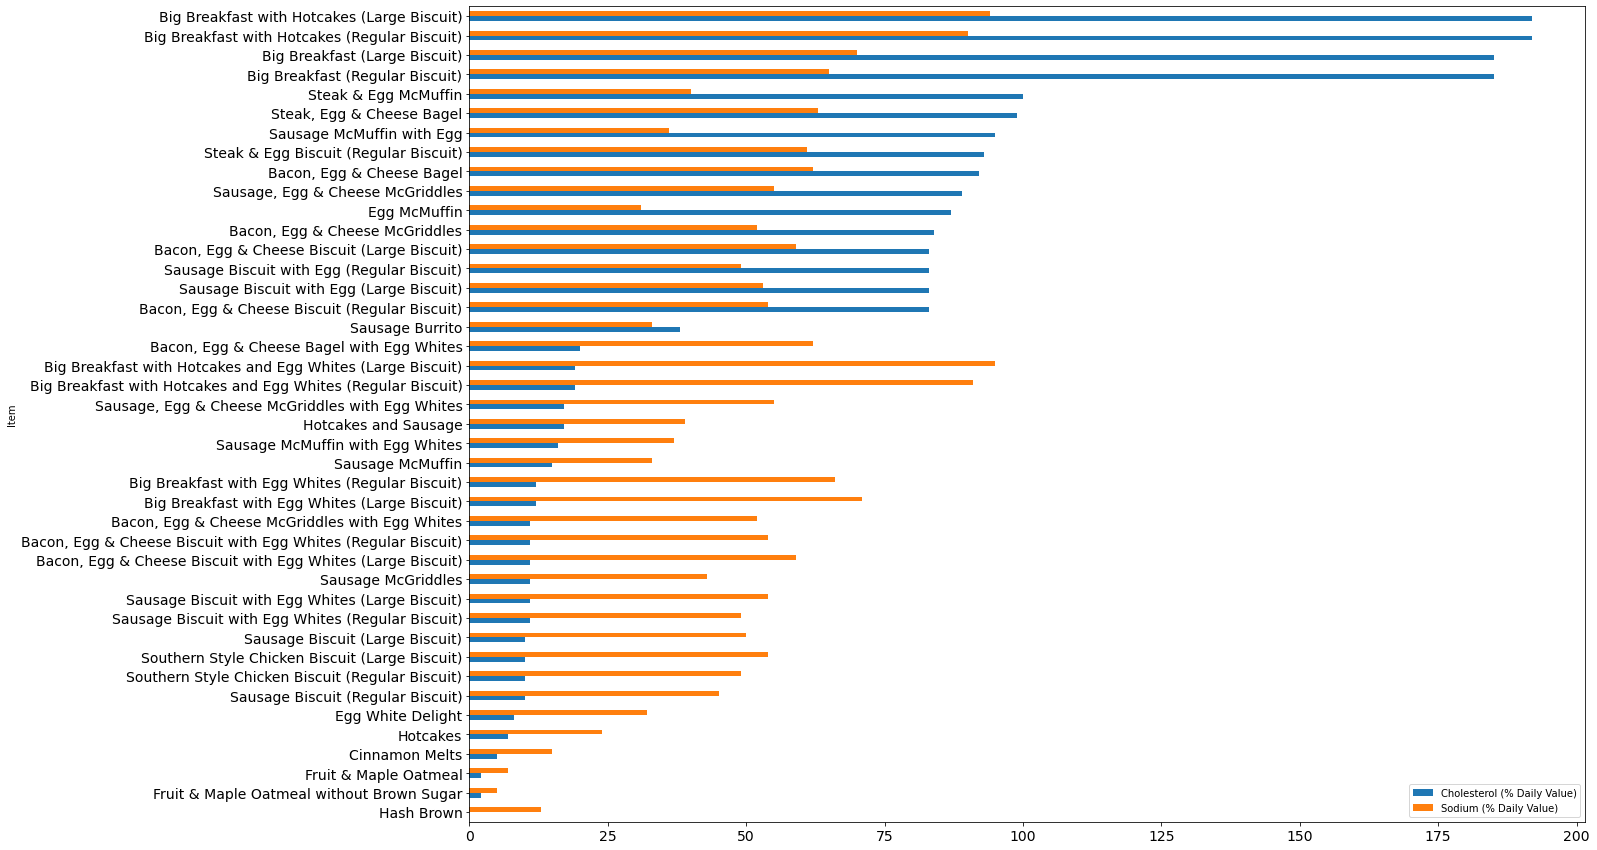

In [45]:
#sorting items from highest to lowest daily average % of cholesterol
breakfast_item = menu[menu['Category']=='Breakfast']
breakfast_item.groupby('Item')['Cholesterol (% Daily Value)','Sodium (% Daily Value)'].mean().sort_values(by='Cholesterol (% Daily Value)',ascending=True).plot.barh(figsize=(20,15), fontsize=14)

correlation:  0.62
### the chart propopsed that both sodium and cholesterol somehow correlated to each other


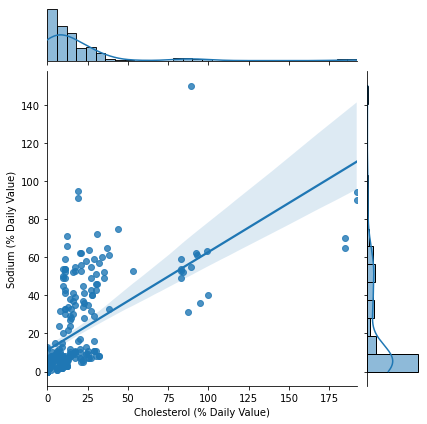

In [47]:
x='Cholesterol (% Daily Value)'
y='Sodium (% Daily Value)'
sns.jointplot(x=x, y=y, data=menu, kind='reg')
corr = np.corrcoef(menu[x],menu[y])[1,0]
print('correlation: ',round(corr,2))
print('### the chart propopsed that both sodium and cholesterol somehow correlated to each other')

### heatmap fitted the purpose to identify the relationship of all % daily value nutritions

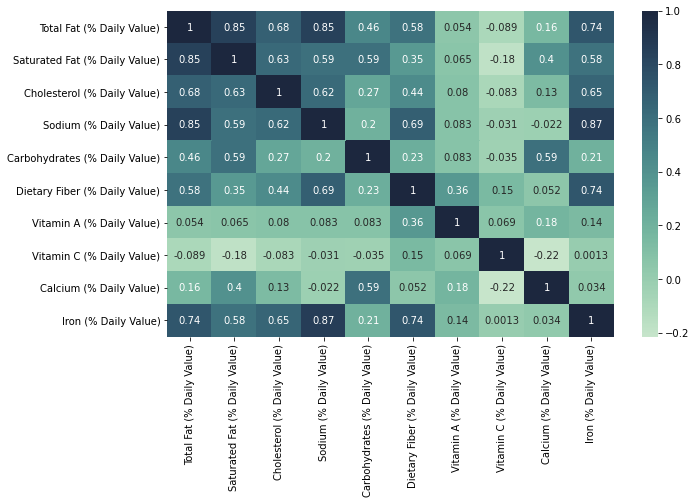

In [48]:
daily_value_fea = menu.filter(like='Daily Value')
fig, ax = plt.subplots(figsize=(10,6))
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
corr_ = sns.heatmap(daily_value_fea.corr(method='pearson'), annot=True, cmap=cmap, ax=ax)

## 4. average daily % of each nutrition in McDonald's menu

In [168]:
#join the daily_value_fea table with columns Category and Item to get the average daily % of each nutrition
daily_value_cat = menu[['Category']].join(daily_value_fea)
daily_value_cat.head()

,Category,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,20,25,87,31,10,17,10,0,25,15
1,Breakfast,12,15,8,32,10,17,6,0,25,8
2,Breakfast,35,42,15,33,10,17,8,0,25,10
3,Breakfast,43,52,95,36,10,17,15,0,30,15
4,Breakfast,35,42,16,37,10,17,6,0,25,10


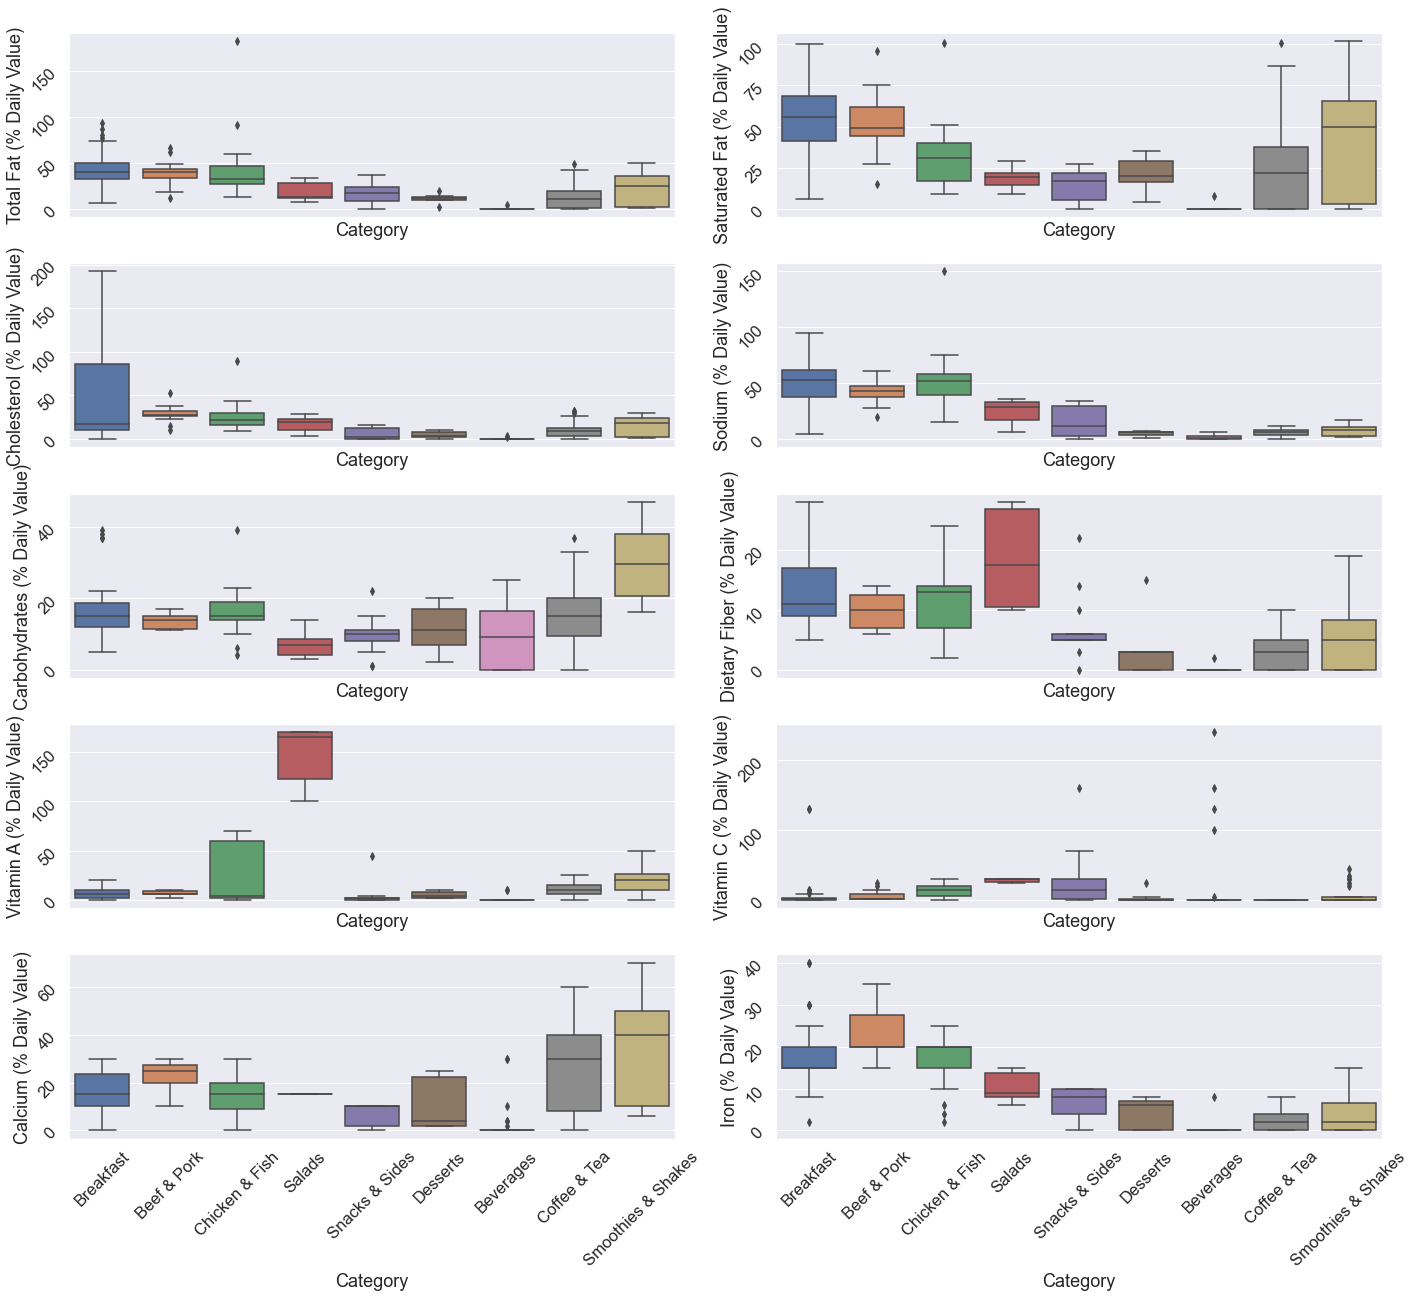

In [201]:
sns.set(font_scale = 1.5)
count = 1
ncols = 2
nrows = int(np.ceil(len(daily_value_cat.columns))/ncols)
fig, ax = plt.subplots(nrows, ncols, figsize=(20,18), sharex=True)
for r in range(nrows):
    for c in range(ncols):
            chart = sns.boxplot(x='Category', y=daily_value_cat.columns[count], data=daily_value_cat, ax = ax[r,c])
            count += 1
            ax[r,c].tick_params(labelrotation=45)
            plt.tight_layout()